In [39]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
import seaborn as sns
import pandas as pd
import numpy as np
import joblib

In [12]:
dataset = sns.load_dataset("iris")
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


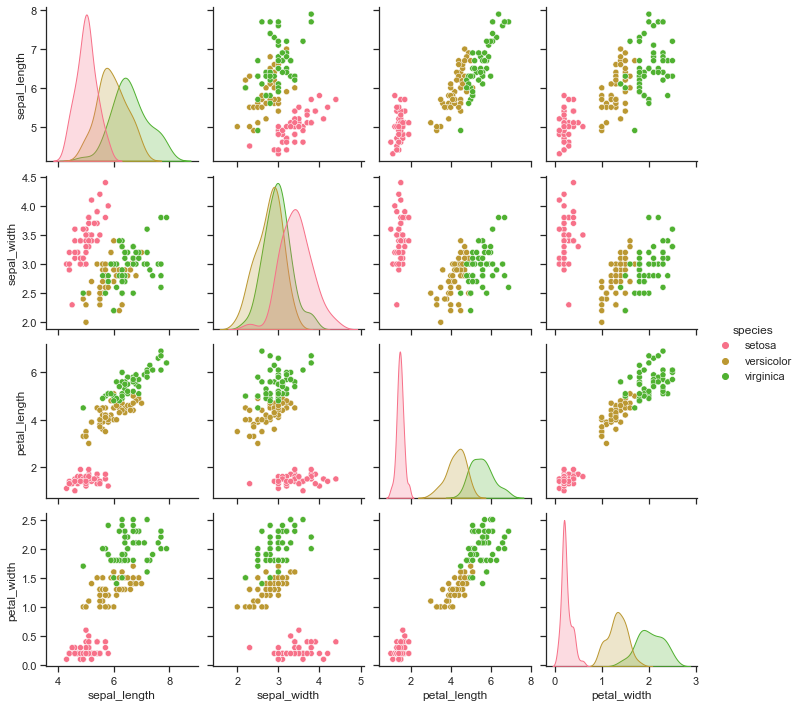

In [13]:
#Plotting the pairwise relationship of different parameters
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(dataset.iloc[:,0:6], hue="species")

In [14]:
# Mapping the dataset ta X->Y values
X = dataset.iloc[:,0:4].values
y = dataset.iloc[:,4].values

# Converting the labels from text into machine usable format
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

# Converting to one hot encoding values for the species
Y = pd.get_dummies(y1).values

#Splitting the data into training and test (80/20)
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [12]:
#X
#y
#y1
#Y
len(X_test)

30

In [15]:
model = Sequential()

model.add(Dense(4,input_shape=(4,),activation='relu'))
#model.add(Dense(8,activation='tanh'))
#model.add(Dense(6,activation='tanh'))
model.add(Dense(3,activation='softmax'))

model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 2ms/step - loss: 1.0963 - accuracy: 0.4500
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7829 - accuracy: 0.6000
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.6333
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5596 - accuracy: 0.6917
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.6917
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.7583
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.8250
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.7250
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3927 - accuracy: 0.7500
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.8917
Epoch 11/100
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0737 - accuracy: 0.9750
Epoch 85/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0798 - accuracy: 0.9667
Epoch 86/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0807 - accuracy: 0.9583
Epoch 87/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.9667
Epoch 88/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1180 - accuracy: 0.9500
Epoch 89/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0764 - accuracy: 0.9583
Epoch 90/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0861 - accuracy: 0.9667
Epoch 91/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0764 - accuracy: 0.9667
Epoch 92/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0777 - accuracy: 0.9667
Epoch 93/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0669 - accuracy: 0.9750
Epoch 94/100
4/4 [===============

In [17]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [18]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [40]:
# Checking the raw model 
X_test2 = np.array([[5, 3.9, 2, 0.5],[5,2.5,3,1],[8,3.5,6,2]]) #setosa, versicolor, virginica
y_pred2 = model.predict(X_test2)
y_pred2

array([[9.9894756e-01, 1.0524773e-03, 1.2709862e-12],
       [3.8544994e-02, 9.6143192e-01, 2.3059845e-05],
       [5.3607761e-11, 4.3497193e-01, 5.6502801e-01]], dtype=float32)

In [41]:
print(np.argmax(y_pred2,axis=1))#0 = setosa 1 = versicolor 2 = virginica

[0 1 2]


In [28]:
# formating the response to a named prediction
finalResponse = ['setosa', 'versicolor', 'virginica']
X_test2 = np.array([[5,2.5,3,1]])#setosa, versicolor, virginica
y_pred2 = model.predict(X_test2)
resposta = np.argmax(y_pred2,axis=1)
print(finalResponse[int(np.argmax(y_pred2,axis=1))])

versicolor


In [46]:
#saving (serializing) the model
filename = 'model/iris_model'
model.save(filename)

INFO:tensorflow:Assets written to: model/iris_model\assets



<h1>Testing the API with Fast API, before deploying to Azure</h1>


In [29]:
import os
import io
import uvicorn
import numpy as np
import nest_asyncio
from enum import Enum
from fastapi import FastAPI, UploadFile, File, HTTPException
from fastapi.responses import StreamingResponse

In [37]:
# Assign an instance of the FastAPI class to the variable "app".
# You will interact with your api using this instance.
app = FastAPI(title='Deploying a ML Model with FastAPI')

# By using @app.get("/") you are allowing the GET method to work for the / endpoint.
@app.get("/")
def home():
    return "API is working as expected. Now head over to http://localhost:8000/docs."


# This endpoint handles all the logic necessaryto id the flower to work.
@app.post("/predict") 
def prediction(sepallength: str, sepalwidth: str, petallength: str, petalwidth: str):

    # 1. VALIDATE INPUT DATA
    # TODO: INSERT VALIDATION CHECK ON PARAMETERS
    
#    if not x_test:
#        raise HTTPException(status_code=415, detail="data format.")
    
    # 2. CONVERT THE PARAMETERS TO NUMBERS BEFORE PRED
    X_test2=np.array([[float(sepallength),float(sepalwidth),float(petallength),float(petalwidth)]])
    
    
    # 3. RUN THE PRED MODEL
    y_pred2 = model.predict(X_test2)    
    
    
    # 4. CONVERT AND SEND THE RESPONSE BACK TO THE CLIENT
    # 0 = setosa 1 = versicolor 2 = virginica
    finalResponse = ['setosa', 'versicolor', 'virginica']

    # Return 
    return finalResponse[int(np.argmax(y_pred2,axis=1))]

this is the server, to stop click the Stop button (beside Run)

In [38]:
# Allows the server to be run in this interactive environment
nest_asyncio.apply()

# Host depends on the setup selected (docker or virtual env)
host = "0.0.0.0" if os.getenv("DOCKER-SETUP") else "127.0.0.1"

# Spin up the server!    
uvicorn.run(app, host=host, port=8000)

INFO:     Started server process [19836]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:65435 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:65435 - "GET /openapi.json HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [19836]
